<a href="https://colab.research.google.com/github/Alessandrags/Alura-Store/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [ ]:
# Lista de DataFrames e nomes das lojas
lojas = [loja, loja2, loja3, loja4]
nomes_lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]

# Dicionário para armazenar os faturamentos
faturamentos = {}

# Calcula o faturamento para cada loja
for i, df in enumerate(lojas):
    faturamento = df["Preço"].sum()
    faturamentos[nomes_lojas[i]] = faturamento

    print(f'{nomes_lojas[i]} tem um faturamento de R${faturamento:,.2f}')


Loja 1 tem um faturamento de R$1,534,509.12
Loja 2 tem um faturamento de R$1,488,459.06
Loja 3 tem um faturamento de R$1,464,025.03
Loja 4 tem um faturamento de R$1,384,497.58


In [ ]:
# Calcula o número de vendas de cada loja

for nome, df in zip(nomes_lojas, lojas):
    vendas = df.shape[0]
    print(f"{nome}: {vendas} vendas realizadas")

Loja 1: 2359 vendas realizadas
Loja 2: 2359 vendas realizadas
Loja 3: 2359 vendas realizadas
Loja 4: 2358 vendas realizadas


In [ ]:
# Calcula o faturamento médio para cada loja

for nome, df in zip(nomes_lojas, lojas):
    media = df['Preço'].mean()

    print(f"{nome}: Faturamento médio por venda = R${media:,.2f}")

Loja 1: Faturamento médio por venda = R$650.49
Loja 2: Faturamento médio por venda = R$630.97
Loja 3: Faturamento médio por venda = R$620.61
Loja 4: Faturamento médio por venda = R$587.15


In [ ]:
# Calcula o faturamento total das 4 lojas

total = sum(df['Preço'].sum() for df in lojas)

print(f"Faturamento total das 4 lojas: R${total:,.2f}")

Faturamento total das 4 lojas: R$5,871,490.79


In [ ]:
# Calcula o ranking das lojas por faturamento

df_faturamento = pd.DataFrame({
    'Loja': nomes_lojas,
    'Faturamento': [df['Preço'].sum() for df in lojas]
}).sort_values('Faturamento', ascending=False)

print(df_faturamento)

     Loja  Faturamento
0  Loja 1   1534509.12
1  Loja 2   1488459.06
2  Loja 3   1464025.03
3  Loja 4   1384497.58


In [ ]:
# Calcula a participação percentual de cada loja

df_faturamento['Participação (%)'] = (df_faturamento['Faturamento'] / total * 100).round(2)

print(df_faturamento)

     Loja  Faturamento  Participação (%)
0  Loja 1   1534509.12             26.13
1  Loja 2   1488459.06             25.35
2  Loja 3   1464025.03             24.93
3  Loja 4   1384497.58             23.58


In [ ]:
# Calcula a diferença em relação a melhor loja

melhor_faturamento = df_faturamento['Faturamento'].max()
df_faturamento['Diferença para a Líder (R$)'] = melhor_faturamento - df_faturamento['Faturamento']

print(df_faturamento)

     Loja  Faturamento  Participação (%)  Diferença para a Líder (R$)
0  Loja 1   1534509.12             26.13                         0.00
1  Loja 2   1488459.06             25.35                     46050.06
2  Loja 3   1464025.03             24.93                     70484.09
3  Loja 4   1384497.58             23.58                    150011.54


# 2. Vendas por Categoria


In [ ]:
# Calcula a quantidade de produtos vendidos por categoria

resultados_por_loja = {}

for nome, df in zip(nomes_lojas, lojas):
    resultados_por_loja[nome] = df['Categoria do Produto'].value_counts().to_dict()

df_resultados = pd.DataFrame(resultados_por_loja).fillna(0)
df_resultados['TOTAL'] = df_resultados.sum(axis=1)
df_resultados = df_resultados.sort_values('TOTAL', ascending=False)

print("\n📊 Vendas por Categoria + Total Geral:\n")
print(df_resultados)


📊 Vendas por Categoria + Total Geral:

                       Loja 1  Loja 2  Loja 3  Loja 4  TOTAL
moveis                    465     442     499     480   1886
eletronicos               448     422     451     451   1772
brinquedos                324     313     315     338   1290
eletrodomesticos          312     305     278     254   1149
esporte e lazer           284     275     277     277   1113
instrumentos musicais     182     224     177     170    753
livros                    173     197     185     187    742
utilidades domesticas     171     181     177     201    730


In [ ]:
#Calcula o valor total faturado por categoria por loja

resultados_valor = {}

for nome, df in zip(nomes_lojas, lojas):
    valor_por_categoria = df.groupby('Categoria do Produto')['Preço'].sum().to_dict()
    resultados_valor[nome] = valor_por_categoria

df_valores = pd.DataFrame(resultados_valor).fillna(0)
df_valores['TOTAL'] = df_valores.sum(axis=1)
df_valores = df_valores.sort_values('TOTAL', ascending=False)

def formatar_moeda(valor):
    return f"R${valor:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")

df_valores_formatado = df_valores.map(formatar_moeda)

print("\n💰 VALOR FATURADO POR CATEGORIA (R$):\n")
print(df_valores_formatado)


💰 VALOR FATURADO POR CATEGORIA (R$):

                             Loja 1        Loja 2        Loja 3        Loja 4  \
eletronicos            R$572.659,23  R$547.773,71  R$547.699,92  R$545.966,86   
eletrodomesticos       R$484.913,36  R$464.758,13  R$438.984,89  R$377.680,65   
moveis                 R$250.178,11  R$235.234,68  R$268.095,56  R$256.705,65   
instrumentos musicais  R$121.731,69  R$139.987,03  R$103.174,45  R$100.136,50   
esporte e lazer         R$52.387,55   R$46.326,09   R$47.456,10   R$44.465,65   
brinquedos              R$23.993,78   R$21.262,21   R$25.869,20   R$27.015,67   
utilidades domesticas   R$16.931,48   R$19.662,86   R$20.080,21   R$20.098,83   
livros                  R$11.713,92   R$13.454,35   R$12.664,70   R$12.427,77   

                                TOTAL  
eletronicos            R$2.214.099,72  
eletrodomesticos       R$1.766.337,03  
moveis                 R$1.010.214,00  
instrumentos musicais    R$465.029,67  
esporte e lazer          R$190.

In [ ]:
#Calcula a participação percentual por valor em cada loja.

print("\n📊 Participação Percentual por VALOR (R$) em Cada Loja:\n")

for loja in df_valores.columns.drop('TOTAL'):
    total_loja = df_valores[loja].sum()
    print(f"\n-----------------------------\n")
    print(f"🔹 {loja} (Faturamento Total: R${total_loja:,.2f})\n")

    for categoria in df_valores.sort_values(loja, ascending=False).index:
        valor = df_valores.loc[categoria, loja]
        percentual = (valor / total_loja) * 100
        print(f"  {categoria.ljust(25)}: {percentual:.1f}% (R${valor:,.2f})")



📊 Participação Percentual por VALOR (R$) em Cada Loja:


-----------------------------

🔹 Loja 1 (Faturamento Total: R$1,534,509.12)

  eletronicos              : 37.3% (R$572,659.23)
  eletrodomesticos         : 31.6% (R$484,913.36)
  moveis                   : 16.3% (R$250,178.11)
  instrumentos musicais    : 7.9% (R$121,731.69)
  esporte e lazer          : 3.4% (R$52,387.55)
  brinquedos               : 1.6% (R$23,993.78)
  utilidades domesticas    : 1.1% (R$16,931.48)
  livros                   : 0.8% (R$11,713.92)

-----------------------------

🔹 Loja 2 (Faturamento Total: R$1,488,459.06)

  eletronicos              : 36.8% (R$547,773.71)
  eletrodomesticos         : 31.2% (R$464,758.13)
  moveis                   : 15.8% (R$235,234.68)
  instrumentos musicais    : 9.4% (R$139,987.03)
  esporte e lazer          : 3.1% (R$46,326.09)
  brinquedos               : 1.4% (R$21,262.21)
  utilidades domesticas    : 1.3% (R$19,662.86)
  livros                   : 0.9% (R$13,454.35)

----

# 3. Média de Avaliação das Lojas

In [ ]:
# Calcula a média de avaliação por lojas

medias_avaliacoes = {}

for nome, df in zip(nomes_lojas, lojas):
    media = df['Avaliação da compra'].mean()
    medias_avaliacoes[nome] = media

print("\n📊 Média das avaliações por loja:")
print("-----------------------------\n")
for nome, media in medias_avaliacoes.items():
    if media >= 4.5:
        feedback = "⭐ Excelente"
    elif media >= 4.0:
        feedback = "👍 Bom"
    else:
        feedback = "💡 Pode melhorar"
    print(f"  {nome.ljust(30)} _ {media:.2f} {feedback}")


📊 Média das avaliações por loja:
-----------------------------

  Loja 1                         _ 3.98 💡 Pode melhorar
  Loja 2                         _ 4.04 👍 Bom
  Loja 3                         _ 4.05 👍 Bom
  Loja 4                         _ 4.00 💡 Pode melhorar


In [ ]:
#Calcula a média percentual das avaliações por categoria e por loja de forma consolidada

df_completo = pd.concat([df.assign(Loja=nome) for df, nome in zip(lojas, nomes_lojas)])

media_por_categoria_loja = df_completo.groupby(['Categoria do Produto', 'Loja'])['Avaliação da compra'].mean().unstack(fill_value=0)
media_percentual_por_categoria_loja = media_por_categoria_loja * 20
media_percentual_consolidada = df_completo.groupby('Categoria do Produto')['Avaliação da compra'].mean() * 20

df_resultados_percentual = media_percentual_por_categoria_loja.copy()
df_resultados_percentual['Média Consolidada (%)'] = media_percentual_consolidada
df_resultados_percentual = df_resultados_percentual.round(1)
df_resultados_percentual.index.name = 'Categoria do Produto'



print("\n📊 Média percentual das avaliações por categoria:")
print("-------------------------------------------------------------------------------\n")
print(df_resultados_percentual)


📊 Média percentual das avaliações por categoria:
-------------------------------------------------------------------------------

Loja                   Loja 1  Loja 2  Loja 3  Loja 4  Média Consolidada (%)
Categoria do Produto                                                        
brinquedos               81.5    80.5    83.9    79.8                   81.4
eletrodomesticos         80.6    81.4    80.2    78.6                   80.3
eletronicos              80.1    79.4    79.7    80.1                   79.9
esporte e lazer          78.0    81.3    78.8    81.1                   79.8
instrumentos musicais    81.0    80.7    80.1    78.2                   80.1
livros                   79.5    79.0    81.0    80.9                   80.1
moveis                   78.9    81.9    82.0    80.0                   80.7
utilidades domesticas    75.0    81.4    81.5    80.2                   79.6


# 4. Produtos Mais e Menos Vendidos

In [ ]:
# Calcula os produtos de cada loja que tem mais e menos venda.


def analisar_produtos_destaque(lojas, nomes_lojas):
    df_completo = pd.concat([df.assign(Loja=nome) for df, nome in zip(lojas, nomes_lojas)])

    # 2. Calcular produtos destaque (quantidade)
    vendas_por_produto = df_completo.groupby(['Loja', 'Produto']).size().unstack(fill_value=0)
    df_resultados = pd.DataFrame({
        'Produto Mais Vendido': vendas_por_produto.idxmax(axis=1),
        'Quantidade (Mais)': vendas_por_produto.max(axis=1),
        'Produto Menos Vendido': vendas_por_produto.idxmin(axis=1),
        'Quantidade (Menos)': vendas_por_produto.min(axis=1)
    })

    # 3. Adicionar valores e percentuais
    valor_por_produto = df_completo.groupby(['Loja', 'Produto'])['Preço'].sum().unstack(fill_value=0)
    total_por_loja = df_completo.groupby('Loja')['Preço'].sum()

    for loja in df_resultados.index:
        for tipo in ['Mais', 'Menos']:
            produto = df_resultados.loc[loja, f'Produto {tipo} Vendido']
            valor = valor_por_produto.loc[loja, produto]
            df_resultados.loc[loja, f'Valor ({tipo})'] = f"R${valor:,.2f}"
            df_resultados.loc[loja, f'% ({tipo})'] = f"{(valor / total_por_loja[loja]) * 100:.2f}%"

    return df_resultados[['Produto Mais Vendido', 'Quantidade (Mais)', 'Valor (Mais)', '% (Mais)',
                         'Produto Menos Vendido', 'Quantidade (Menos)', 'Valor (Menos)', '% (Menos)']]

if __name__ == "__main__":
    df_resultados = analisar_produtos_destaque(lojas, nomes_lojas)
    print("\n📊 Resultado Consolidado:")
    print(df_resultados.to_markdown(tablefmt="grid", stralign="center"))


📊 Resultado Consolidado:
+--------+--------------------------+---------------------+----------------+------------+-------------------------+----------------------+-----------------+-------------+
|  Loja  |   Produto Mais Vendido   |   Quantidade (Mais) |  Valor (Mais)  |  % (Mais)  |  Produto Menos Vendido  |   Quantidade (Menos) |  Valor (Menos)  |  % (Menos)  |
+========+==========================+=====================+================+============+=========================+======================+=================+=============+
| Loja 1 |      Guarda roupas       |                  60 |  R$39,282.78   |   2.56%    |      Celular ABXY       |                   33 |   R$43,534.47   |    2.84%    |
+--------+--------------------------+---------------------+----------------+------------+-------------------------+----------------------+-----------------+-------------+
| Loja 2 | Iniciando em programação |                  65 |   R$4,169.96   |   0.28%    |    Jogo de tabuleiro    |    

# 5. Frete Médio por Loja


In [ ]:
#Calcula o frete médio por loja

frete_medio_por_loja = {}
for i in range(len(lojas)):
    nome = nomes_lojas[i]
    df = lojas[i]
    frete_medio = df['Frete'].mean()
    frete_medio_por_loja[nome] = round(frete_medio, 2)

df_frete_medio = pd.DataFrame({
    'Loja': frete_medio_por_loja.keys(),
    'Frete Médio (R$)': frete_medio_por_loja.values()
})

print("\n📦 Custo Médio de Frete por Loja:")
print("=" * 35)
print(df_frete_medio.to_markdown(tablefmt="grid", index=False))


📦 Custo Médio de Frete por Loja:
+--------+--------------------+
| Loja   |   Frete Médio (R$) |
+========+====================+
| Loja 1 |              34.69 |
+--------+--------------------+
| Loja 2 |              33.62 |
+--------+--------------------+
| Loja 3 |              33.07 |
+--------+--------------------+
| Loja 4 |              31.28 |
+--------+--------------------+




# 6. Gráficos


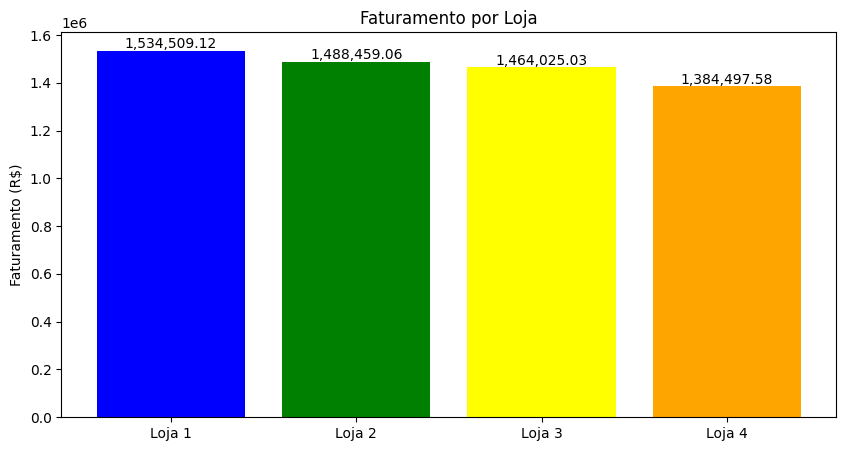

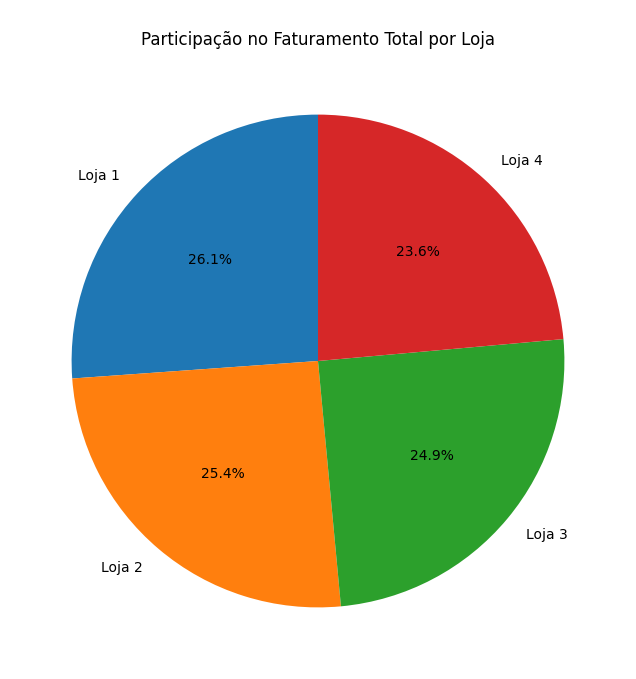

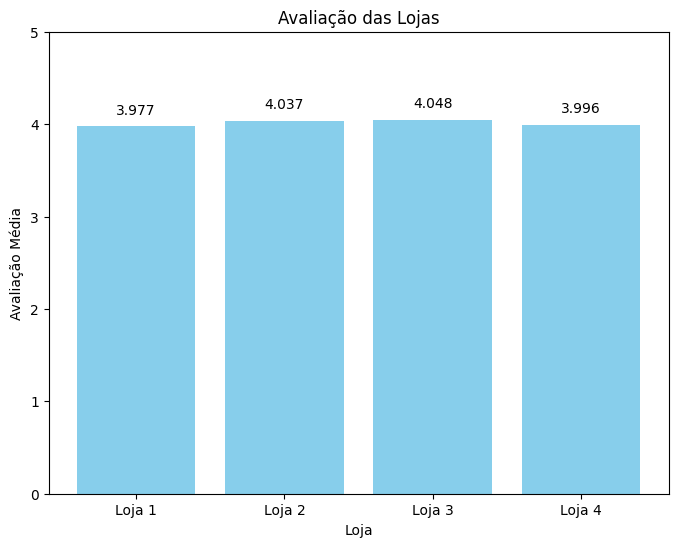

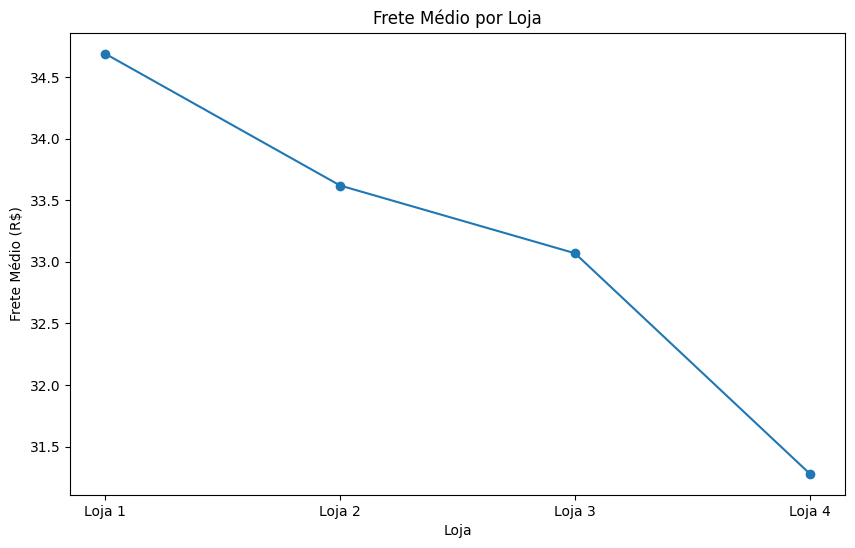

In [ ]:
import matplotlib.pyplot as plt

# Gráfico de barras do Faturamento por Loja
plt.figure(figsize=(10, 5))
bars = plt.bar(df_faturamento['Loja'], df_faturamento['Faturamento'], color=['blue', 'green', 'yellow', 'orange'])
plt.ylabel("Faturamento (R$)")
plt.title("Faturamento por Loja")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{yval:,.2f}', ha='center', va='bottom')

plt.show()

# Gráfico de pizza da Participação no Faturamento Total
plt.figure(figsize=(8, 8))
plt.pie(df_faturamento['Participação (%)'], labels=df_faturamento['Loja'], autopct='%1.1f%%', startangle=90)
plt.title("\nParticipação no Faturamento Total por Loja")
plt.show()

# Gráfico  de barra da Médias de Avaliacões da Loja
lojas = list(medias_avaliacoes.keys())
avaliacoes = list(medias_avaliacoes.values())
plt.figure(figsize=(8, 6))
plt.bar(lojas, avaliacoes, color='skyblue')
plt.xlabel("Loja")
plt.ylabel("Avaliação Média")
plt.title("Avaliação das Lojas")
plt.ylim(0, 5)
for i, v in enumerate(avaliacoes):
    plt.text(i, v + 0.1, f'{v:.3f}', ha='center', va='bottom', color='black', fontsize=10)
plt.show()

# Gráfico de linhas do Frete Médio por Loja
plt.figure(figsize=(10, 6))
plt.plot(df_frete_medio['Loja'], df_frete_medio['Frete Médio (R$)'], marker='o')
plt.xlabel("Loja")
plt.ylabel("Frete Médio (R$)")
plt.title("Frete Médio por Loja")
plt.show()


# 7. Relatório


## Análise de Desempenho das Lojas

Este relatório apresenta uma análise detalhada do desempenho das quatro lojas pertencentes ao Senhor João, com o objetivo de identificar qual estabelecimento seria mais estratégico para venda. A análise baseia-se em indicadores como: **faturamento total**, **categorias de produtos**, **avaliações de clientes**, **produtos mais e menos vendidos** e **frete médio**, fundamentada para auxiliar na tomada de decisão.

## 1. Faturamento Total

O faturamento total das quatro lojas apresenta a seguinte distribuição:

- **Loja 1**: R\$1.534.509,12 (26,13% de participação)
- **Loja 2**: R\$1.488.459,06 (25,35% de participação)
- **Loja 3**: R\$1.464.025,03 (24,93% de participação)
- **Loja 4**: R\$1.384.497,58 (23,58% de participação)

A **Loja 1** lidera com uma vantagem de R\$46.050,06 sobre a **Loja 2**. Todas as lojas apresentam desempenho equilibrado, com participações de mercado variando entre 23,58% e 26,13%.

## 2. Avaliações de Clientes

As médias de avaliações das lojas são:

- **Loja 1**: 3,997
- **Loja 2**: 4,037
- **Loja 3**: 4,048
- **Loja 4**: 3,996

A **Loja 1**, apesar do maior faturamento, tem a **menor média de avaliação**. Todas as lojas mantêm avaliações próximas a 4 em uma escala de 5, indicando boa satisfação geral.

## 3. Vendas e Faturamento por Categoria

A categoria **Móveis** lidera em volume de vendas em todas as lojas, seguida por **Eletrônicos**. Destaques:

- **Loja 3**: Maior volume de vendas de **Móveis** (499 unidades).
- **Loja 4**: Destaque em **Brinquedos** (338 unidades) e **Utilidades Domésticas** (201 unidades).

A categoria mais lucrativa é **Eletrônicos**, com mais de R\$2,2 milhões de faturamento total, seguida por **Eletrodomésticos** (R\$1,7 milhão).

Desempenho por loja:

- **Loja 1**: Lidera em **Eletrônicos** (R\$572.659,23) e **Eletrodomésticos** (R\$484.913,36).
- **Loja 2**: Melhor desempenho em **Instrumentos Musicais** (R\$139.987,03) e **Livros** (R\$13.454,35).
- **Loja 3**: Destaque em **Móveis**, em volume (499 unidades) e faturamento (R\$268.095,56).
- **Loja 4**: Maior equilíbrio na distribuição de vendas entre categorias.

**Eletrônicos** e **Eletrodomésticos** têm ticket médio mais alto, enquanto **Livros** e **Utilidades Domésticas** contribuem menos para o faturamento.

## 4. Produtos Mais e Menos Vendidos

- **Loja 4**: Produto mais vendido (**Cama box**) com maior impacto percentual (3,17%).
- **Loja 1**: Produto menos vendido (**Celular ABXY**, 2,84%) gera mais receita que o mais vendido (**Guarda-roupas**, 2,56%).
- **Loja 2**: Produto mais vendido em volume (65 unidades), mas com menor percentual (0,28%).
- **Loja 3**: Produto menos vendido com menor percentual (0,11%).

## 5. Frete Médio

- **Loja 4**: Menor frete médio (R\$31,28), um diferencial competitivo.
- **Loja 1**: Maior frete médio (R\$34,69), podendo impactar negativamente a experiência de compra.

## Análise dos Pontos Fortes e Fracos

### Pontos Fortes

- **Loja 1**:
  - Maior faturamento total (R\$1.534.509,12).
  - Maior participação de mercado (26,13%).

- **Loja 2**:
  - Segunda melhor avaliação média (4,037).
  - Segundo maior faturamento (R\$1.488.459,06).

- **Loja 3**:
  - Melhor avaliação média (4,048).
  - Terceiro maior faturamento (R\$1.464.025,03).

- **Loja 4**:
  - Menor frete médio (R\$31,28).
  - Produto mais vendido com maior impacto percentual (3,17%).

### Pontos Fracos

- **Loja 1**:
  - Menor média de avaliação (3,997).
  - Maior frete médio (R\$34,69).

- **Loja 2**:
  - Produto mais vendido com baixo valor e impacto (0,28%).

- **Loja 3**:
  - Produto menos vendido com valor muito baixo (0,11%).

- **Loja 4**:
  - Menor faturamento total (R\$1.384.497,58).
  - Maior diferença para a loja líder (R\$150.011,54).
---
## Recomendação

Recomendo a venda da **Loja 4** pelos seguintes motivos:

- **Desempenho financeiro inferior**: Menor faturamento (R\$1.384.497,58), com diferença de R\$150.011,54 para a **Loja 1**.
- **Potencial limitado de crescimento**: O menor frete médio não se traduziu em maior volume de vendas ou faturamento.
- **Preservação do negócio principal**: Lojas 1, 2 e 3 formam um conjunto mais coeso e complementar.
- **Avaliações de clientes**: A **Loja 4** tem avaliação inferior às Lojas 2 e 3.
- **Maximização do valor do negócio**: Vender a **Loja 4** permite focar em operações mais rentáveis, reinvestindo recursos nas demais lojas por exemplo.

Os recursos da venda podem ser usados para melhorar a **Loja 1** (avaliações e frete) ou ampliar a **Loja 3** (melhor avaliação). Após a venda, recomendo uma análise aprofundada do mix de produtos das lojas remanescentes para otimizar estoque e rentabilidade.

Esta recomendação considera uma visão estratégica de longo prazo para o crescimento sustentável e a maximização do valor do negócio.

# 8. Análise de Desempenho Geográfico



In [ ]:
import folium
from folium.plugins import HeatMap

# Criar um mapa centralizado no Brasil
mapa = folium.Map(location=[-15, -50], zoom_start=4)

# Preparar os dados para o Heatmap
dados_heatmap = []
for index, row in df_completo.iterrows():
    if pd.notna(row['lat']) and pd.notna(row['lon']):
        dados_heatmap.append([row['lat'], row['lon']])  # Adicionar lat/lon à lista

# Adicionar o Heatmap ao mapa
HeatMap(dados_heatmap).add_to(mapa)

# Exibir o mapa
mapa